In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 122)
pd.set_option('display.max_rows', 150)

In [3]:
df = pd.read_csv(r'C:\Users\surya\Desktop\Jupyter Python Programs\Mini Project - Data Mining\application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df1 = df.copy()

### Reducing memory usage by dataframes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# Refrence - https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

# Other references - 
# 1. https://www.analyticsvidhya.com/blog/2021/04/how-to-reduce-memory-usage-in-python-pandas/#:~:text=This%20can%20reduce%20memory%20usage,to%20the%20range%20of%20values.
# 2. https://www.geeksforgeeks.org/pandas-memory-management/#:~:text=Memory_usage()%3A,labels%20present%20in%20the%20Index.&text=However%2C%20Info()%20only%20gives,of%20each%20column%20in%20bytes.

def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('object')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
df = reduce_mem_usage(df)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 92.38 MB
Decreased by 67.7%


### Data Summary

In [7]:
df.shape

(307511, 122)

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int32  
 1    TARGET                        int8   
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int8   
 7    AMT_INCOME_TOTAL              float32
 8    AMT_CREDIT                    float32
 9    AMT_ANNUITY                   float32
 10   AMT_GOODS_PRICE               float32
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float16
 17   DAYS_BIRTH                    int16  
 18   DA

In [9]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.0,307511.000000,104582.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.0,306490.000000,306490.0,306490.000000,307510.0,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.0,265992.0,265992.0
mean,278180.518577,0.080729,0.417052,1.687391e+05,5.988308e+05,27110.958984,5.379796e+05,0.020859,-16036.995067,63815.045904,NaN,-2994.202373,NaN,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,NaN,NaN,NaN,0.117493,0.088440,NaN,NaN,0.044647,0.078918,0.149536,0.226440,0.232056,0.066345,0.100647,0.107361,0.008812,0.028351,0.114197,0.087463,NaN,NaN,0.042480,0.074524,0.145264,0.222412,0.227905,0.064941,0.105652,0.106079,0.008087,0.027008,0.117676,0.087952,NaN,NaN,0.044586,0.078064,0.149170,0.225952,0.231934,0.067261,0.101929,0.108643,0.008652,0.028259,0.102478

In [10]:
# get the count, size and Unique value in each column of application data
df.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,307233,306219,307511,307511,307511,307511,307511,307511,307511,307511,307511,104582,307511,307511,307511,307511,307511,307511,211120,307509,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,134133,306851,246546,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,151450,127568,157504,103023,92646,143620,152683,154491,98869,124921,97312,153161,93997,137829,97216,153214,159080,151170,161756,306490,306490,306490,306490,307510,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,1002,7,8,5,6,6,81,17460,12574,5282,6168,62,2,2,2

### Checking for duplicate records and null values

In [11]:
df[df.duplicated()] 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum().sum()

9152465

In [14]:
df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [15]:
round(100*(df.isnull().sum()/len(df)),2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

<AxesSubplot:>

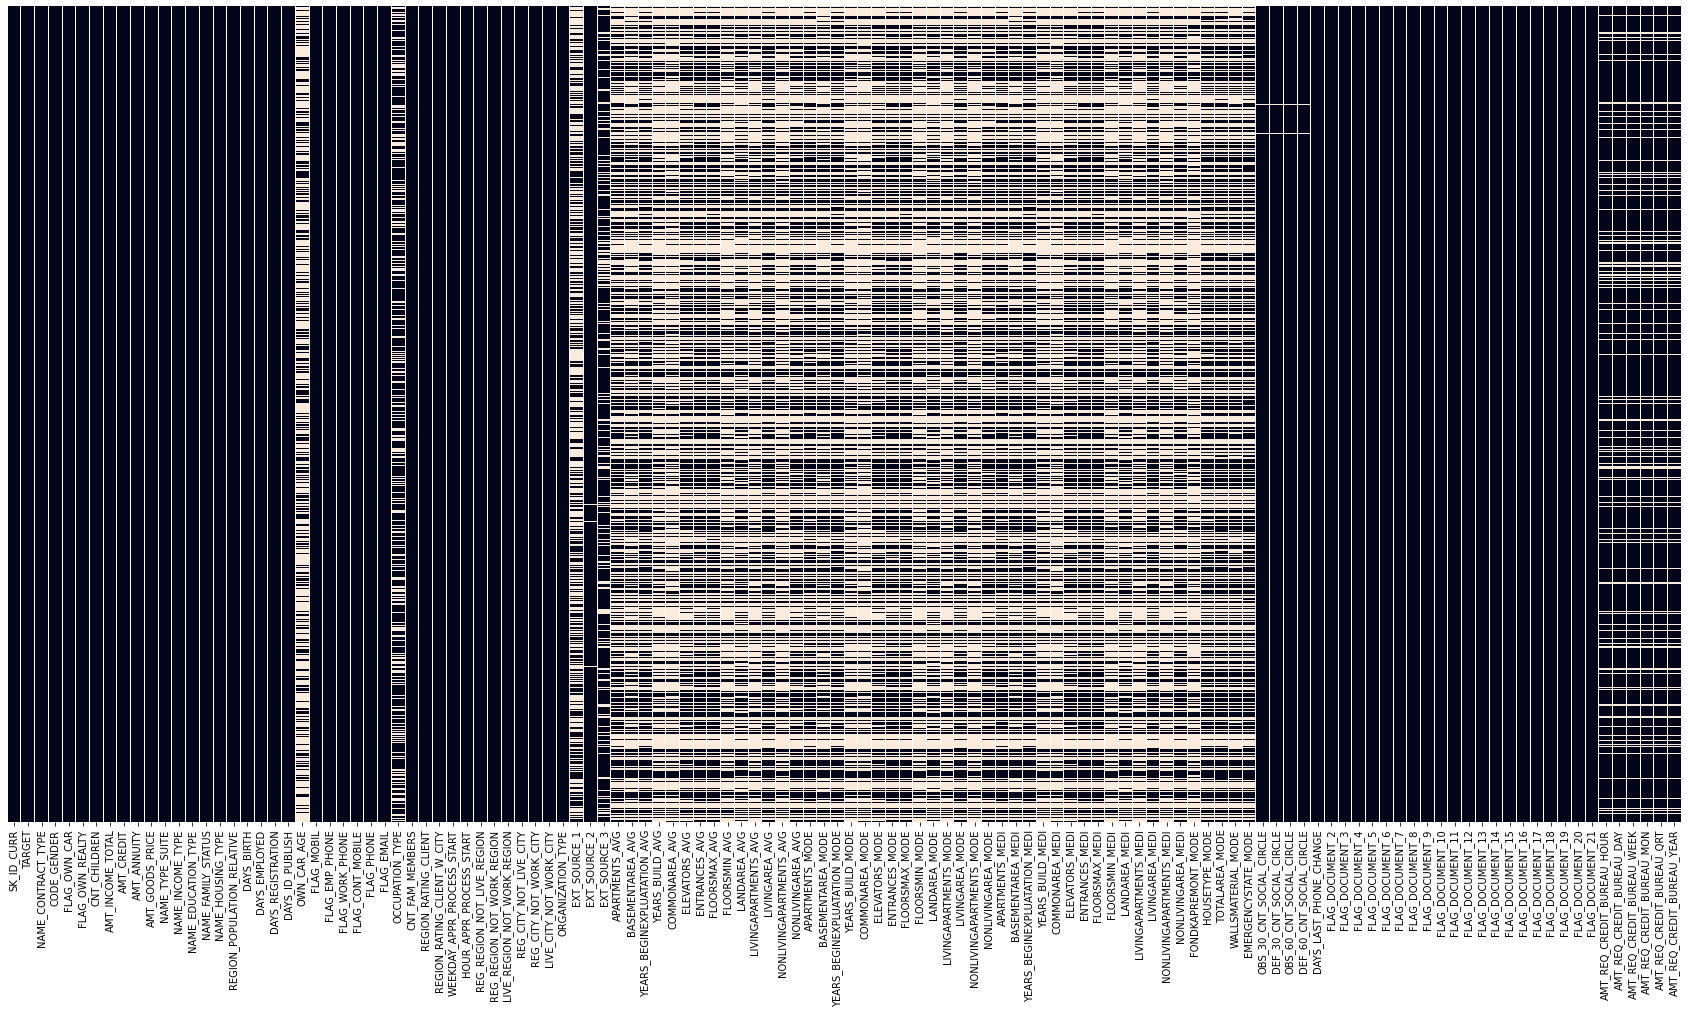

In [16]:
plt.figure(figsize = (30,15))   # For adjusting size of heat map, ref = https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

### Distribution of TARGET variable

In [17]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [18]:
defaulters = df[df['TARGET']==1]
nondefaulters = df[df['TARGET']==0]

In [19]:
percentage_defaulters = (len(defaulters)*100)/len(df)
percentage_nondefaulters = (len(nondefaulters)*100)/len(df)

print("The Percentage of people who have paid their loan is:", round(percentage_nondefaulters,2),"%")
print("The Percentage of people who have NOT paid their loan is:", round(percentage_defaulters,2),"%")
print("The Ratio of Data Imbalance is:", round(len(nondefaulters)/len(defaulters),2))

The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have NOT paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


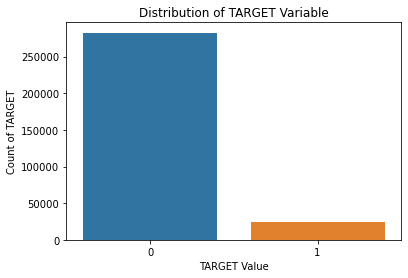

In [20]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

sns.countplot(df['TARGET'])
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

#### Conclusion - There are far more loans that were repaid on time than loans that were not repaid. More than 25000 loans were repaid, less than 5000 loans were not repaid.

In [21]:
try:
    for col in [col for col in df1.columns if 'AVG' in col]+[col for col in df1.columns if 'MEDI' in col]+[col for col in df1.columns if 'MODE' in col]:
        print(col, ' --------- ', df1['TARGET'].corr(df1[col]))
except TypeError:
    pass

APARTMENTS_AVG  ---------  -0.029497564633431526
BASEMENTAREA_AVG  ---------  -0.02274574319014809
YEARS_BEGINEXPLUATATION_AVG  ---------  -0.009727673268680109
YEARS_BUILD_AVG  ---------  -0.02214928406338873
COMMONAREA_AVG  ---------  -0.018549661629760336
ELEVATORS_AVG  ---------  -0.03419879367526815
ENTRANCES_AVG  ---------  -0.019172182012738237
FLOORSMAX_AVG  ---------  -0.04400337053240212
FLOORSMIN_AVG  ---------  -0.033613503251899934
LANDAREA_AVG  ---------  -0.010884822678806654
LIVINGAPARTMENTS_AVG  ---------  -0.02503053329106433
LIVINGAREA_AVG  ---------  -0.03299711746761156
NONLIVINGAPARTMENTS_AVG  ---------  -0.0031761075207261385
NONLIVINGAREA_AVG  ---------  -0.01357806978198486
APARTMENTS_MEDI  ---------  -0.02918375887669348
BASEMENTAREA_MEDI  ---------  -0.022081261373189928
YEARS_BEGINEXPLUATATION_MEDI  ---------  -0.00999309655969653
YEARS_BUILD_MEDI  ---------  -0.022325926477474348
COMMONAREA_MEDI  ---------  -0.0185728689077109
ELEVATORS_MEDI  ---------  -0.

## Making 1 column out of multiple columns

### Mean (avg) columns

In [22]:
AVG_cols = [col for col in df.columns if 'AVG' in col]
AVG_cols

['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG']

In [23]:
# float16 was giving problems (mean and sum as nan), so converting them to float64
df['YEARS_BEGINEXPLUATATION_AVG'] = df['YEARS_BEGINEXPLUATATION_AVG'].astype(np.float64)
df['YEARS_BUILD_AVG'] = df['YEARS_BUILD_AVG'].astype(np.float64)

In [24]:
avg_summary = pd.DataFrame(columns=['col_name', 'null_sum', 'mean', 'median'])
for col in AVG_cols:
    #print(col, "    ", df[col].isnull().sum(), "    ", df[col].mean(), "    ", df[col].median())
    avg_summary = avg_summary.append({'col_name': col, 
                                    'null_sum': df[col].isnull().sum(), 
                                    'mean': df[col].mean(), 
                                    'median': df[col].median()}, ignore_index=True)
avg_summary

,col_name,null_sum,mean,median
0,APARTMENTS_AVG,156061,0.117493,0.087585
1,BASEMENTAREA_AVG,179943,0.088440,0.076294
2,YEARS_BEGINEXPLUATATION_AVG,150007,0.977716,0.981445
3,YEARS_BUILD_AVG,204488,0.752477,0.755371
4,COMMONAREA_AVG,214865,0.044647,0.021103
5,ELEVATORS_AVG,163891,0.078918,0.000000
6,ENTRANCES_AVG,154828,0.149536,0.137939
7,FLOORSMAX_AVG,153020,0.226440,0.166748
8,FLOORSMIN_AVG,208642,0.232056,0.208252
9,LANDAREA_AVG,182590,0.066345,0.048096


In [25]:
for col in AVG_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [26]:
avg_df = df[AVG_cols]
avg_df.head()

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG
0,0.024704,0.036896,0.972168,0.619141,0.014297,0.000000,0.068970,0.083313,0.125000,0.036896,0.020203,0.018997,0.000000,0.000000
1,0.095886,0.052887,0.984863,0.795898,0.060486,0.080017,0.034485,0.291748,0.333252,0.013000,0.077271,0.054901,0.003901,0.009804
2,0.117493,0.088440,0.977716,0.752477,0.044647,0.078918,0.149536,0.226440,0.232056,0.066345,0.100647,0.107361,0.008812,0.028351
3,0.117493,0.088440,0.977716,0.752477,0.044647,0.078918,0.149536,0.226440,0.232056,0.066345,0.100647,0.107361,0.008812,0.028351
4,0.117493,0.088440,0.977716,0.752477,0.044647,0.078918,0.149536,0.226440,0.232056,0.066345,0.100647,0.107361,0.008812,0.028351


In [27]:
df['STD_OF_LIVING_AVG'] = avg_df.mean(axis=1)

In [28]:
df.drop(columns = AVG_cols, inplace=True)

In [29]:
df['TARGET'].corr(df['STD_OF_LIVING_AVG'])

-0.025056725961678808

### Median columns

In [30]:
MEDI_cols = [col for col in df.columns if 'MEDI' in col]
MEDI_cols

['APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI']

In [31]:
# float16 was giving problems (mean and sum as nan), so converting them to float64
df['YEARS_BEGINEXPLUATATION_MEDI'] = df['YEARS_BEGINEXPLUATATION_MEDI'].astype(np.float64)
df['YEARS_BUILD_MEDI'] = df['YEARS_BUILD_MEDI'].astype(np.float64)

In [32]:
median_summary = pd.DataFrame(columns=['col_name', 'null_sum', 'mean', 'median'])
for col in MEDI_cols:
    #print(col, "    ", df[col].isnull().sum(), "    ", df[col].mean(), "    ", df[col].median())
    median_summary = median_summary.append({'col_name': col, 
                                    'null_sum': df[col].isnull().sum(), 
                                    'mean': df[col].mean(), 
                                    'median': df[col].median()}, ignore_index=True)
median_summary

,col_name,null_sum,mean,median
0,APARTMENTS_MEDI,156061,0.117676,0.086426
1,BASEMENTAREA_MEDI,179943,0.087952,0.075806
2,YEARS_BEGINEXPLUATATION_MEDI,150007,0.977733,0.981445
3,YEARS_BUILD_MEDI,204488,0.755743,0.758301
4,COMMONAREA_MEDI,214865,0.044586,0.020798
5,ELEVATORS_MEDI,163891,0.078064,0.000000
6,ENTRANCES_MEDI,154828,0.149170,0.137939
7,FLOORSMAX_MEDI,153020,0.225952,0.166748
8,FLOORSMIN_MEDI,208642,0.231934,0.208252
9,LANDAREA_MEDI,182590,0.067261,0.048706


In [33]:
for col in MEDI_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [34]:
median_df = df[MEDI_cols]
median_df.head()

,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI
0,0.024994,0.036896,0.972168,0.624512,0.014397,0.000000,0.068970,0.083313,0.125000,0.037506,0.020493,0.019302,0.000000,0.000000
1,0.096802,0.052887,0.984863,0.798828,0.060791,0.080017,0.034485,0.291748,0.333252,0.013199,0.078674,0.055786,0.003901,0.010002
2,0.086426,0.075806,0.981445,0.758301,0.020798,0.000000,0.137939,0.166748,0.208252,0.048706,0.076111,0.074890,0.000000,0.003099
3,0.086426,0.075806,0.981445,0.758301,0.020798,0.000000,0.137939,0.166748,0.208252,0.048706,0.076111,0.074890,0.000000,0.003099
4,0.086426,0.075806,0.981445,0.758301,0.020798,0.000000,0.137939,0.166748,0.208252,0.048706,0.076111,0.074890,0.000000,0.003099


In [35]:
df['STD_OF_LIVING_MEDIAN'] = median_df.mean(axis=1)

In [36]:
df.drop(columns = MEDI_cols, inplace=True)

In [37]:
df['TARGET'].corr(df['STD_OF_LIVING_MEDIAN'])

-0.034400253797733434

### Mode columns

In [38]:
MODE_cols = [col for col in df.columns if 'MODE' in col]
MODE_cols

['APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [39]:
# float16 was giving problems (mean and sum as nan), so converting them to float64
df['YEARS_BEGINEXPLUATATION_MODE'] = df['YEARS_BEGINEXPLUATATION_MODE'].astype(np.float64)
df['YEARS_BUILD_MODE'] = df['YEARS_BUILD_MODE'].astype(np.float64)

In [40]:
# Some columns in this have Object datatype, so we cannot directly operate on them
for col in MODE_cols:
    print(col, "                   ", df[col].dtypes)

APARTMENTS_MODE                     float16
BASEMENTAREA_MODE                     float16
YEARS_BEGINEXPLUATATION_MODE                     float64
YEARS_BUILD_MODE                     float64
COMMONAREA_MODE                     float16
ELEVATORS_MODE                     float16
ENTRANCES_MODE                     float16
FLOORSMAX_MODE                     float16
FLOORSMIN_MODE                     float16
LANDAREA_MODE                     float16
LIVINGAPARTMENTS_MODE                     float16
LIVINGAREA_MODE                     float16
NONLIVINGAPARTMENTS_MODE                     float16
NONLIVINGAREA_MODE                     float16
FONDKAPREMONT_MODE                     object
HOUSETYPE_MODE                     object
TOTALAREA_MODE                     float16
WALLSMATERIAL_MODE                     object
EMERGENCYSTATE_MODE                     object


In [41]:
for col in MODE_cols:
    if df[col].dtypes == 'O':
        print(col)

FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [42]:
obj_mode = df[['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']]
obj_mode.head()

,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,reg oper account,block of flats,"Stone, brick",No
1,reg oper account,block of flats,Block,No
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [43]:
for col in obj_mode:
    print(df[col].value_counts(), '\n')

reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: FONDKAPREMONT_MODE, dtype: int64 

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64 

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64 

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64 



In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
for col in obj_mode:
    df[col] = le.fit_transform(df[col].astype(str))  # why used .astype(str) - https://stackoverflow.com/questions/58868256/scikit-learn-label-encoder-resulting-in-error-argument-must-be-a-string-or-numb
    df[col] = df[col]/df[col].max()

In [46]:
df[['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']]

,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.75,0.000000,0.714286,0.0
1,0.75,0.000000,0.000000,0.0
2,0.00,0.333333,1.000000,1.0
3,0.00,0.333333,1.000000,1.0
4,0.00,0.333333,1.000000,1.0
...,...,...,...,...
307506,0.75,0.000000,0.714286,0.0
307507,0.75,0.000000,0.714286,0.0
307508,0.75,0.000000,0.571429,0.0
307509,0.00,0.000000,0.714286,0.0


In [47]:
mode_summary = pd.DataFrame(columns=['col_name', 'null_sum', 'mean', 'median'])
for col in MODE_cols:
    #print(col, "    ", df[col].isnull().sum(), "    ", df[col].mean(), "    ", df[col].median())
    mode_summary = mode_summary.append({'col_name': col, 
                                    'null_sum': df[col].isnull().sum(), 
                                    'mean': df[col].mean(), 
                                    'median': df[col].median(),
                                    'mode': df[col].mode()[0]}, ignore_index=True)
mode_summary

,col_name,null_sum,mean,median,mode
0,APARTMENTS_MODE,156061,0.114197,0.083984,0.083984
1,BASEMENTAREA_MODE,179943,0.087463,0.074585,0.000000
2,YEARS_BEGINEXPLUATATION_MODE,150007,0.977037,0.981445,0.987305
3,YEARS_BUILD_MODE,204488,0.759632,0.764648,0.830078
4,COMMONAREA_MODE,214865,0.042480,0.018997,0.000000
5,ELEVATORS_MODE,163891,0.074524,0.000000,0.000000
6,ENTRANCES_MODE,154828,0.145264,0.137939,0.137939
7,FLOORSMAX_MODE,153020,0.222412,0.166748,0.166748
8,FLOORSMIN_MODE,208642,0.227905,0.208252,0.208252
9,LANDAREA_MODE,182590,0.064941,0.045807,0.000000


In [48]:
for col in MODE_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [49]:
mode_df = df[MODE_cols]
mode_df.head()

,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0.025208,0.038300,0.972168,0.634277,0.014397,0.000000,0.068970,0.083313,0.125000,0.037689,0.022003,0.019806,0.0,0.0,0.75,0.000000,0.014900,0.714286,0.0
1,0.092407,0.053802,0.984863,0.804199,0.049713,0.080627,0.034485,0.291748,0.333252,0.012802,0.078979,0.055389,0.0,0.0,0.75,0.000000,0.071411,0.000000,0.0
2,0.083984,0.000000,0.987305,0.830078,0.000000,0.000000,0.137939,0.166748,0.208252,0.000000,0.055115,0.000000,0.0,0.0,0.00,0.333333,0.000000,1.000000,1.0
3,0.083984,0.000000,0.987305,0.830078,0.000000,0.000000,0.137939,0.166748,0.208252,0.000000,0.055115,0.000000,0.0,0.0,0.00,0.333333,0.000000,1.000000,1.0
4,0.083984,0.000000,0.987305,0.830078,0.000000,0.000000,0.137939,0.166748,0.208252,0.000000,0.055115,0.000000,0.0,0.0,0.00,0.333333,0.000000,1.000000,1.0


In [50]:
df['STD_OF_LIVING_MODE'] = mode_df.mean(axis=1)

In [51]:
df.drop(columns = MODE_cols, inplace=True)

In [52]:
df['TARGET'].corr(df['STD_OF_LIVING_MODE'])

0.00015862587705953862

### Finally, after converting multiple avg, median and mode columns into their individual single column

In [53]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,STD_OF_LIVING_AVG,STD_OF_LIVING_MEDIAN,STD_OF_LIVING_MODE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018799,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083008,0.262939,0.139404,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.144327,0.144825,0.185280
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003542,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311279,0.622070,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.206314,0.206803,0.194404
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010033,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556152,0.729492,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.212803,0.188466,0.252777
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008018,-19005,-3039,-9832.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650391,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.212803,0.188466,0.252777
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028656,-19932,-3038,-4312.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322754,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.212803,0.188466,0.252777


In [54]:
df.shape

(307511, 78)

#### We reduced 122-78 = 44 columns with this method

## Handling Missing Values Datatype wise

### 1. Object (strings) datatype

In [55]:
print("Object type values:",np.count_nonzero(df.select_dtypes('object').columns))

Object type values: 12


In [56]:
object_cols = df.select_dtypes('object').columns
object_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [57]:
df[object_cols]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1


In [58]:
# https://stackoverflow.com/questions/36808434/label-encoder-encoding-missing-values#:~:text=Don't%20use%20LabelEncoder%20with%20missing%20values.
df[object_cols].isnull().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               96391
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [59]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace(np.nan, df['NAME_TYPE_SUITE'].mode()[0])
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace(np.nan, df['OCCUPATION_TYPE'].mode()[0])

In [60]:
for col in object_cols:
    print(col, df[col].nunique())

NAME_CONTRACT_TYPE 2
CODE_GENDER 3
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
NAME_TYPE_SUITE 7
NAME_INCOME_TYPE 8
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 6
NAME_HOUSING_TYPE 6
OCCUPATION_TYPE 18
WEEKDAY_APPR_PROCESS_START 7
ORGANIZATION_TYPE 58


In [61]:
# Replacing XNA gender by mode
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA', df['CODE_GENDER'].mode()[0])

In [62]:
# https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
df['NAME_CONTRACT_TYPE'] = le.fit_transform(df['NAME_CONTRACT_TYPE'])
df['CODE_GENDER'] = le.fit_transform(df['CODE_GENDER'])
df['FLAG_OWN_CAR'] = le.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = le.fit_transform(df['FLAG_OWN_REALTY'])
df['NAME_TYPE_SUITE'] = le.fit_transform(df['NAME_TYPE_SUITE'].astype(str))
df['NAME_INCOME_TYPE'] = le.fit_transform(df['NAME_INCOME_TYPE'])
df['NAME_EDUCATION_TYPE'] = le.fit_transform(df['NAME_EDUCATION_TYPE'])
df['NAME_FAMILY_STATUS'] = le.fit_transform(df['NAME_FAMILY_STATUS'])
df['NAME_HOUSING_TYPE'] = le.fit_transform(df['NAME_HOUSING_TYPE'])
df['OCCUPATION_TYPE'] = le.fit_transform(df['OCCUPATION_TYPE'].astype(str))
df['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(df['WEEKDAY_APPR_PROCESS_START'])
df['ORGANIZATION_TYPE'] = le.fit_transform(df['ORGANIZATION_TYPE'])

The following columns had various categories, so we divide all the values of a particular column with their maximum value so as to normalize it and make sure our model doesn't give a lot of importance to higher values.

In [64]:
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'] / df['NAME_TYPE_SUITE'].max()
df['NAME_INCOME_TYPE'] = df['NAME_INCOME_TYPE'] / df['NAME_INCOME_TYPE'].max()
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'] / df['NAME_EDUCATION_TYPE'].max()
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'] / df['NAME_FAMILY_STATUS'].max()
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'] / df['NAME_HOUSING_TYPE'].max()
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'] / df['OCCUPATION_TYPE'].max()
df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'] / df['WEEKDAY_APPR_PROCESS_START'].max()
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'] / df['ORGANIZATION_TYPE'].max()

In [65]:
df[object_cols]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0,1,0,1,1.000000,1.000000,1.00,0.6,0.2,0.470588,1.000000,0.087719
1,0,0,0,0,0.166667,0.571429,0.25,0.2,0.2,0.176471,0.166667,0.684211
2,1,1,1,1,1.000000,1.000000,1.00,0.6,0.2,0.470588,0.166667,0.192982
3,0,0,0,1,1.000000,1.000000,1.00,0.0,0.2,0.470588,1.000000,0.087719
4,0,1,0,1,1.000000,1.000000,1.00,0.6,0.2,0.176471,0.666667,0.649123
...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,1.000000,1.000000,1.00,0.4,1.0,0.823529,0.666667,0.754386
307507,0,0,0,1,1.000000,0.428571,1.00,1.0,0.2,0.470588,0.166667,1.000000
307508,0,0,0,1,1.000000,1.000000,0.25,0.4,0.2,0.588235,0.666667,0.684211
307509,0,0,0,1,1.000000,0.142857,1.00,0.2,0.2,0.470588,1.000000,0.052632


In [66]:
df[object_cols].isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [68]:
df.shape

(307511, 78)

### 2. Integer datatype

In [69]:
print("Int type values:",np.count_nonzero(df.select_dtypes(include=['int8', 'int16', 'int32', 'int64']).columns))

Int type values: 45


In [70]:
int_cols = df.select_dtypes(include=['int8', 'int16', 'int32', 'int64']).columns
int_cols

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCU

In [71]:
df[int_cols]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,1,0,1,0,-9461,-637,-2120,1,1,0,1,1,0,2,2,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,0,-16765,-1188,-291,1,1,0,1,1,0,1,1,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,1,0,-19046,-225,-2531,1,1,1,1,1,0,2,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,0,1,0,-19005,-3039,-2437,1,1,0,1,0,0,2,2,17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,1,0,-19932,-3038,-3458,1,1,0,1,0,0,2,2,11,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,-9327,-236,-1982,1,1,0,1,0,0,1,1,15,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,0,0,1,0,-20775,365243,-4090,1,0,0,1,1,0,2,2,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,0,0,1,0,-14966,-7921,-5150,1,1,0,1,0,1,3,3,9,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,0,0,1,0,-11961,-4786,-931,1,1,0,1,0,0,2,2,9,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
flag_doc_cols = [col for col in df.columns if 'FLAG_DOCUMENT' in col]

In [73]:
for col in flag_doc_cols:
    print(col, '  ', df['TARGET'].corr(df[col]))

FLAG_DOCUMENT_2    0.005417144279619401
FLAG_DOCUMENT_3    0.04434634685114491
FLAG_DOCUMENT_4    -0.002672082170162238
FLAG_DOCUMENT_5    -0.00031577741664633847
FLAG_DOCUMENT_6    -0.02860189397306161
FLAG_DOCUMENT_7    -0.0015195031600879014
FLAG_DOCUMENT_8    -0.00804038446605674
FLAG_DOCUMENT_9    -0.0043524085808421785
FLAG_DOCUMENT_10    -0.0014138915975241467
FLAG_DOCUMENT_11    -0.004229349652160026
FLAG_DOCUMENT_12    -0.0007557507043579017
FLAG_DOCUMENT_13    -0.01158322234141919
FLAG_DOCUMENT_14    -0.009463821935576834
FLAG_DOCUMENT_15    -0.00653565758409485
FLAG_DOCUMENT_16    -0.011614671588293374
FLAG_DOCUMENT_17    -0.0033775691474139833
FLAG_DOCUMENT_18    -0.007952385099462443
FLAG_DOCUMENT_19    -0.0013575183243008221
FLAG_DOCUMENT_20    0.000215393557977287
FLAG_DOCUMENT_21    0.0037086250293065204


In [74]:
# Dropping columns with value 0 upto 2 decimal places (i.e. 0.00.....)
flag_drop_col = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
                 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_14', 
                 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
                 'FLAG_DOCUMENT_21']
df.drop(flag_drop_col, axis=1, inplace=True)

In [75]:
int_cols = df.select_dtypes(include=['int8', 'int16', 'int32', 'int64']).columns
int_cols

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16'],
      dtype='object')

In [76]:
df[int_cols].isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_16               0
dtype: int64

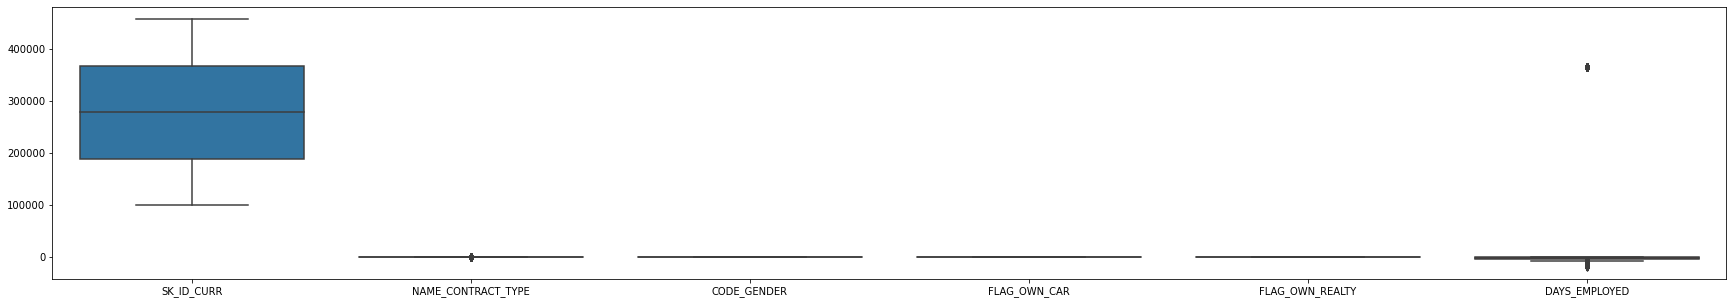

In [77]:
plt.figure(figsize=(30,5))
sns.boxplot(data=df.select_dtypes('int'))
plt.show()

<AxesSubplot:xlabel='DAYS_EMPLOYED'>

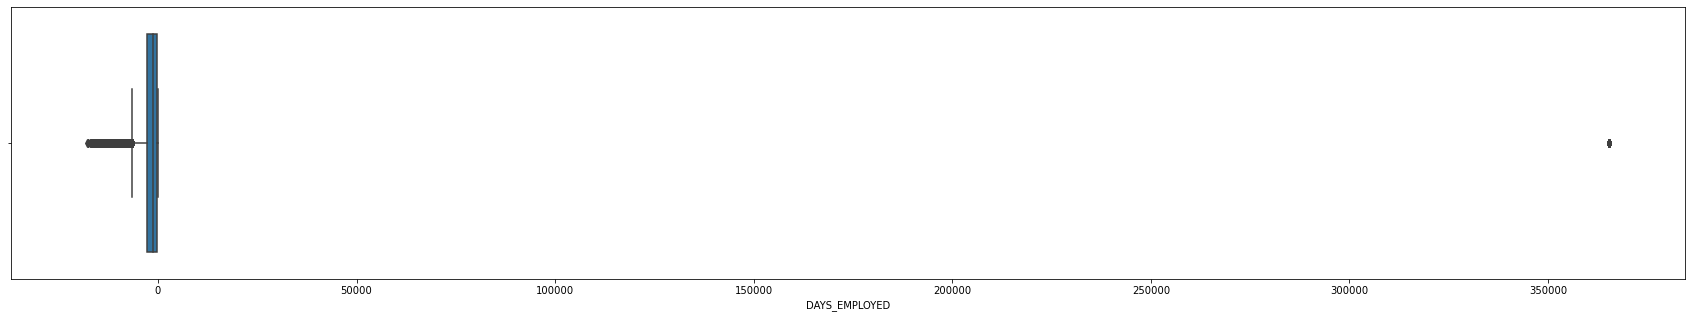

In [78]:
plt.figure(figsize=(30,5))
sns.boxplot(df['DAYS_EMPLOYED'])

In [79]:
df['DAYS_EMPLOYED'].value_counts()

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11060         1
-10409         1
-10155         1
-11948         1
-12341         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

#### We can see the outlier here with the value 365243. These were probably NaN values (since all other values are negative and this is the only one positive) and got replaced by 365243, so we convert these to NaN and then fill with the mean of other values in the cooumn.

In [80]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)

In [81]:
df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].mean(), inplace=True)

In [82]:
df['DAYS_EMPLOYED'].value_counts()

-2384.169325     55374
-200.000000        156
-224.000000        152
-199.000000        151
-230.000000        151
                 ...  
-10367.000000        1
-8957.000000         1
-10160.000000        1
-14067.000000        1
-10444.000000        1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

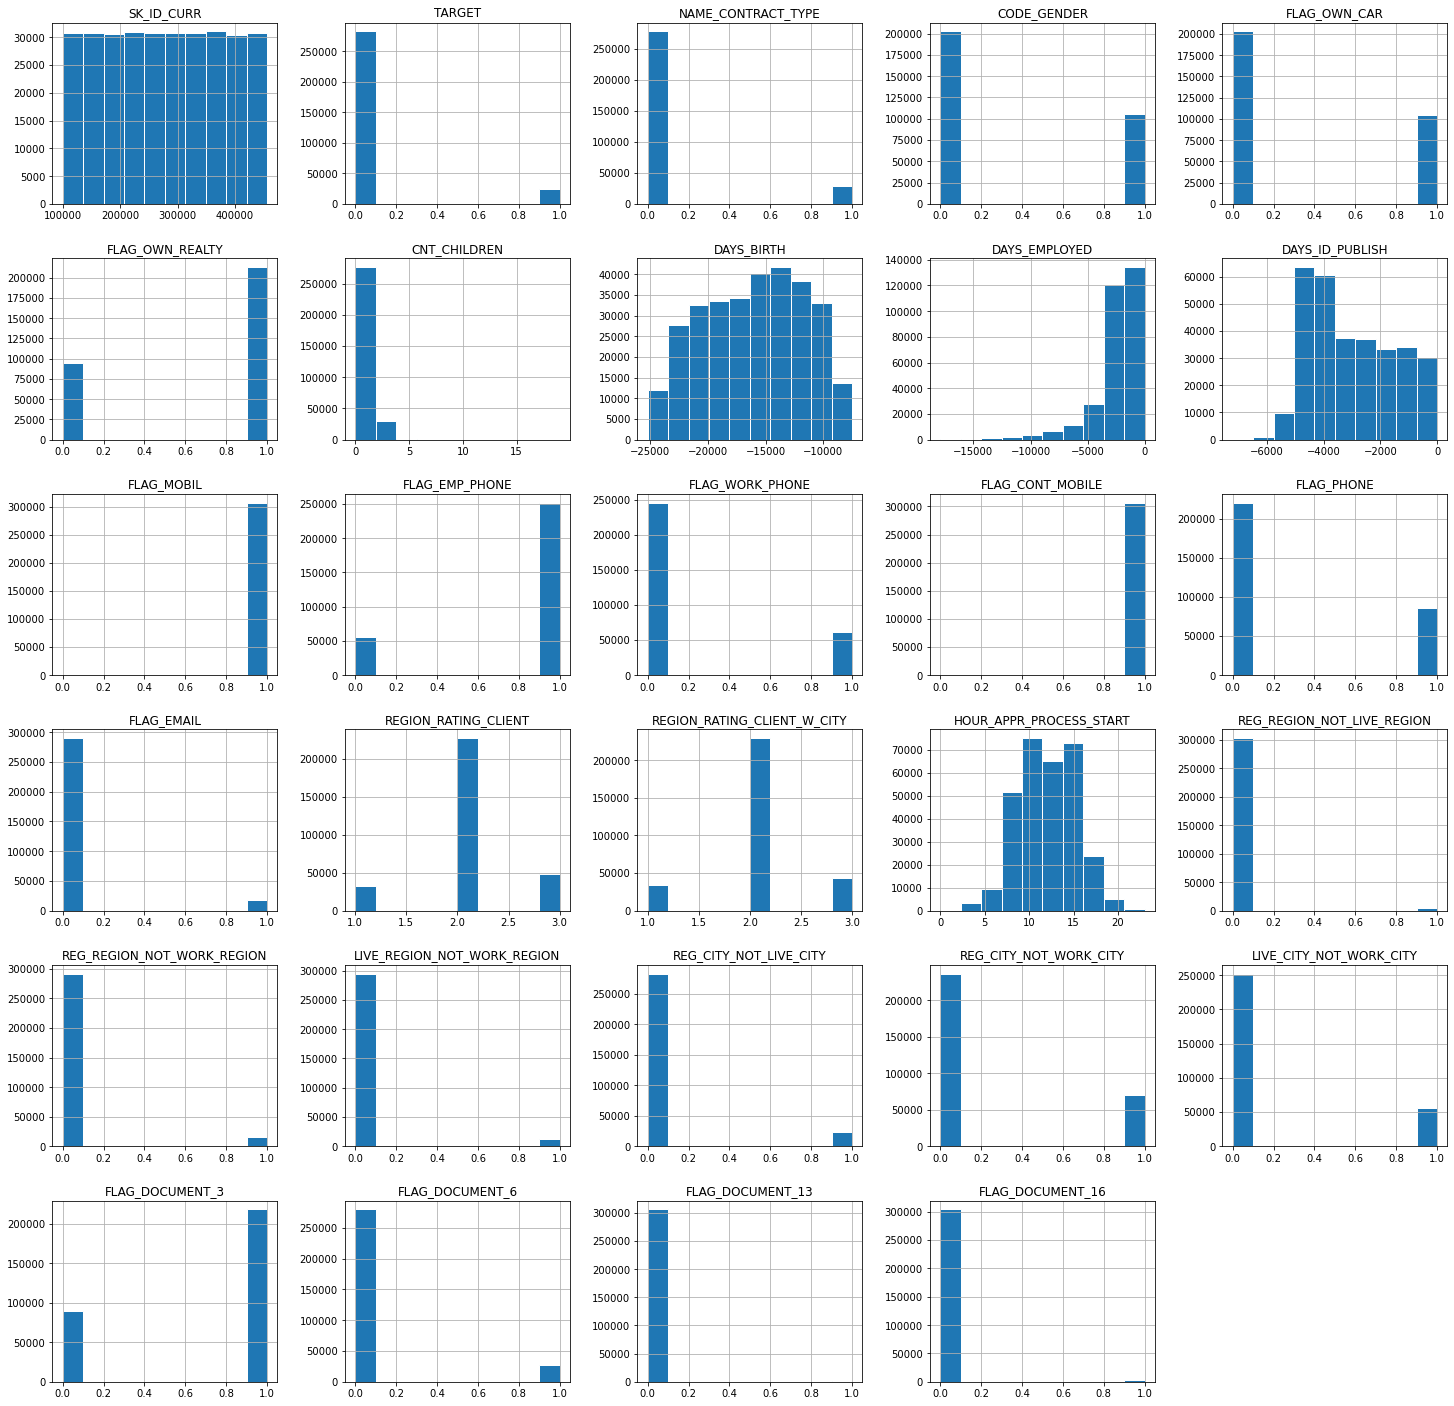

In [83]:
df[int_cols].hist(figsize=(25,25), ec='w')
plt.show()

In [84]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df[int_cols].corr().style.applymap(color_)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16
SK_ID_CURR,1.000000,-0.002108,0.001654,-0.000728,0.001216,0.000703,-0.001129,-0.001500,-0.000077,-0.000384,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,-0.003411,0.002121,0.000896,-0.000724
TARGET,-0.002108,1.000000,-0.030896,0.054713,-0.021851,-0.006148,0.019187,0.078239,0.070075,0.051457,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,0.044346,-0.028602,-0.011583,-0.011615
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,-0.008783,0.004022,0.067177,0.029998,0.086364,0.034089,0.052847,0.000585,0.054938,-0.033647,-0.097116,-0.021378,-0.010811,-0.021593,-0.023116,0.035897,0.018561,0.015774,0.007941,0.013586,0.004487,-0.004999,-0.479724,-0.098808,-0.004900,-0.023433
CODE_GENDER,-0.000728,0.054713,-0.008783,1.000000,0.345841,-0.044380,0.047382,0.148060,0.085636,0.000132,-0.002503,0.157239,0.033922,-0.006020,-0.019518,0.018233,-0.017885,-0.017288,0.007145,0.023692,0.103458,0.106080,0.048257,0.137581,0.133275,-0.087258,-0.100756,0.040453,0.000067
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,0.345841,1.000000,-0.002817,0.102023,0.129879,0.021365,0.013661,-0.002512,0.154659,0.011471,-0.006644,-0.007588,0.032105,-0.022668,-0.021405,0.014369,-0.000668,0.038937,0.046352,0.003123,0.076081,0.088061,-0.070000,-0.106012,0.080647,0.001984
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.044380,-0.002817,1.000000,-0.002366,-0.119146,-0.028133,0.006664,-0.001198,-0.070021,-0.114043,0.008526,-0.041507,0.029247,0.001289,0.001884,-0.102687,-0.036301,-0.032316,-0.018324,-0.061709,-0.061889,-0.035991,-0.036839,0.041567,-0.057484,-0.092272
CNT_CHILDREN,-0.001129,0.019187,0.029998,0.047382,0.102023,-0.002366,1.000000,0.330938,0.058513,-0.028019,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,0.056837,-0.157024,0.003945,0.010662
DAYS_BIRTH,-0.001500,0.078239,0.086364,0.148060,0.129879,-0.119146,0.330938,1.000000,0.267750,0.272691,-0.003084,0.619888,0.172457,-0.014985,-0.042402,0.088208,0.009361,0.008073,0.091064,0.065486,0.095819,0.069567,0.180382,0.242401,0.158882,0.109666,-0.407160,0.026333,0.024044
DAYS_EMPLOYED,-0.000077,0.070075,0.034089,0.085636,0.021365,-0.028133,0.058513,0.267750,1.000000,0.081695,-0.001781,0.000037,-0.010971,-0.004580,-0.051433,0.029342,-0.009803,-0.008493,0.016683,0.054902,0.081207,0.061907,0.110018,0.124489,0.073941,-0.040135,-0.015510,0.006185,0.006136
DAYS_ID_PUBLISH,-0.000384,0.051457,0.052847,0.000132,0.013661,0.006664,-0.028019,0.272691,0.081695,1.000000,-0.002293,0.273611,0.045964,-0.000802,-0.037660,0.027505,-0.005103,-0.007737,0.031676,0.034757,0.048071,0.033938,0.076326,0.099354,0.061094,0.050309,-0.178282,0.003048,0.002782


<AxesSubplot:>

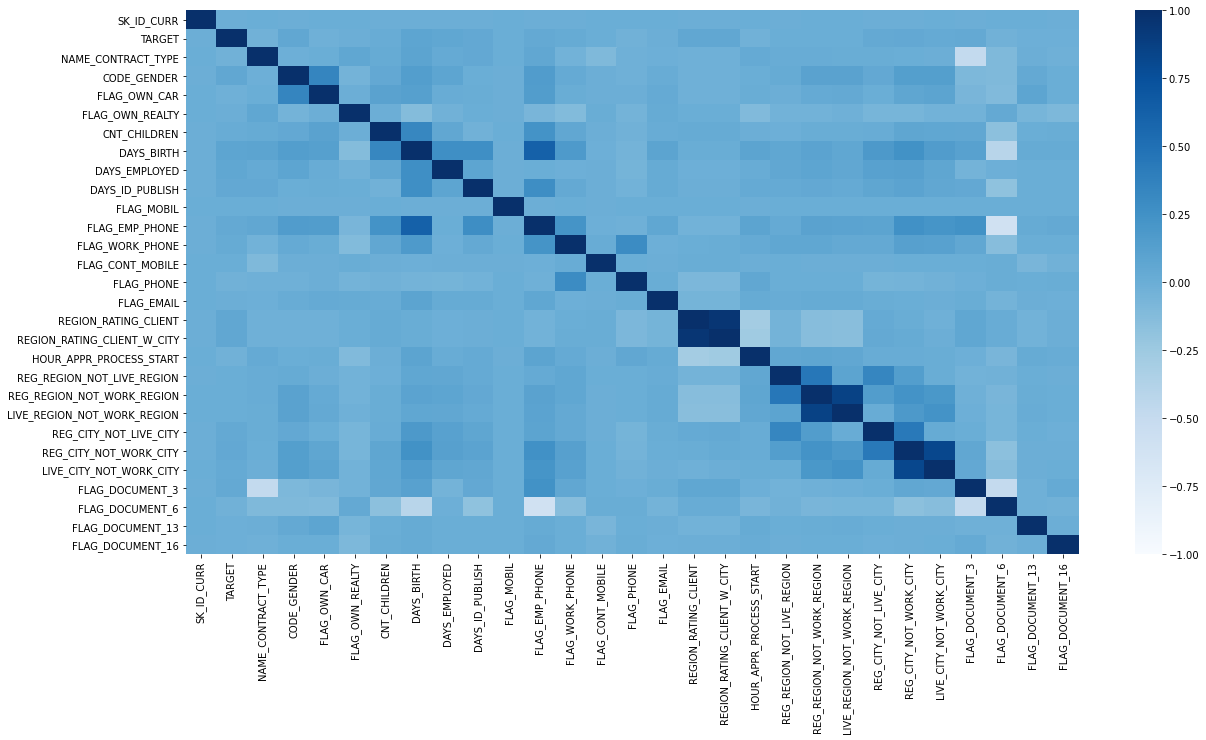

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(df[int_cols].corr(), cmap='Blues', vmin=-1, vmax=1)

### Inference -
1. FLAG_OWN_CAR and CODE_GENDER are somewhat correlated.
2. DAYS_BIRTH is highly correlated with CNT_CHILDREN, DAYS_EMPLOYED, DAYS_ID_PUBLISH and FLAG_EMP_PHONE.
3. REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY are extremly correlated.
4. FLAG_DOCUMENT_6 is very less correlated with DAYS_BIRTH and FLAG_EMP_PHONE.

In [86]:
df.shape

(307511, 62)

### 3. float datatype

In [87]:
print("float type values:",np.count_nonzero(df.select_dtypes(include=['float16', 'float32', 'float64']).columns))

float type values: 34


In [88]:
float_cols = df.select_dtypes(include=['float16', 'float32', 'float64']).columns
float_cols

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'STD_OF_LIVING_AVG',
       'STD_OF_LIVING_MEDIAN', 'STD_OF_LIVING_MODE'],
      dtype='object')

In [89]:
df[float_cols].isnull().sum().sort_values(ascending = False)

OWN_CAR_AGE                   202929
EXT_SOURCE_1                  173378
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
STD_OF_LIVING_AVG                  0
STD_OF_LIVING_MEDIAN               0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
ORGANIZATION_TYPE                  0
WEEKDAY_APPR_PROCESS_START         0
OCCUPATION_TYPE                    0
DAYS_REGISTRATION                  0
DAYS_EMPLOYED                      0
R

In [90]:
df.shape

(307511, 62)

In [91]:
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [92]:
df.shape

(307511, 62)

In [93]:
df[float_cols].isnull().sum().sort_values(ascending = False)

OWN_CAR_AGE                   2
AMT_INCOME_TOTAL              0
AMT_REQ_CREDIT_BUREAU_HOUR    0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
DAYS_LAST_PHONE_CHANGE        0
AMT_REQ_CREDIT_BUREAU_DAY     0
EXT_SOURCE_2                  0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
STD_OF_LIVING_AVG             0
STD_OF_LIVING_MEDIAN          0
EXT_SOURCE_3                  0
EXT_SOURCE_1                  0
AMT_CREDIT                    0
ORGANIZATION_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
CNT_FAM_MEMBERS               0
OCCUPATION_TYPE               0
DAYS_REGISTRATION             0
DAYS_EMPLOYED                 0
REGION_POPULATION_RELATIVE    0
NAME_HOUSING_TYPE             0
NAME_FAMILY_STATUS            0
NAME_EDUCATION_TYPE           0
NAME_INCOME_TYPE              0
NAME_TYPE_SUITE               0
AMT_GOOD

In [94]:
df['OWN_CAR_AGE']

0           NaN
1           NaN
2         26.00
3         23.75
4         21.50
          ...  
307506    10.00
307507    10.00
307508    10.00
307509    10.00
307510    10.00
Name: OWN_CAR_AGE, Length: 307511, dtype: float16

In [95]:
df.shape

(307511, 62)

In [96]:
df.dropna(axis = 'index', how='any', inplace=True)

In [97]:
df.isnull().sum().sum()

0

In [98]:
df.shape

(307509, 62)

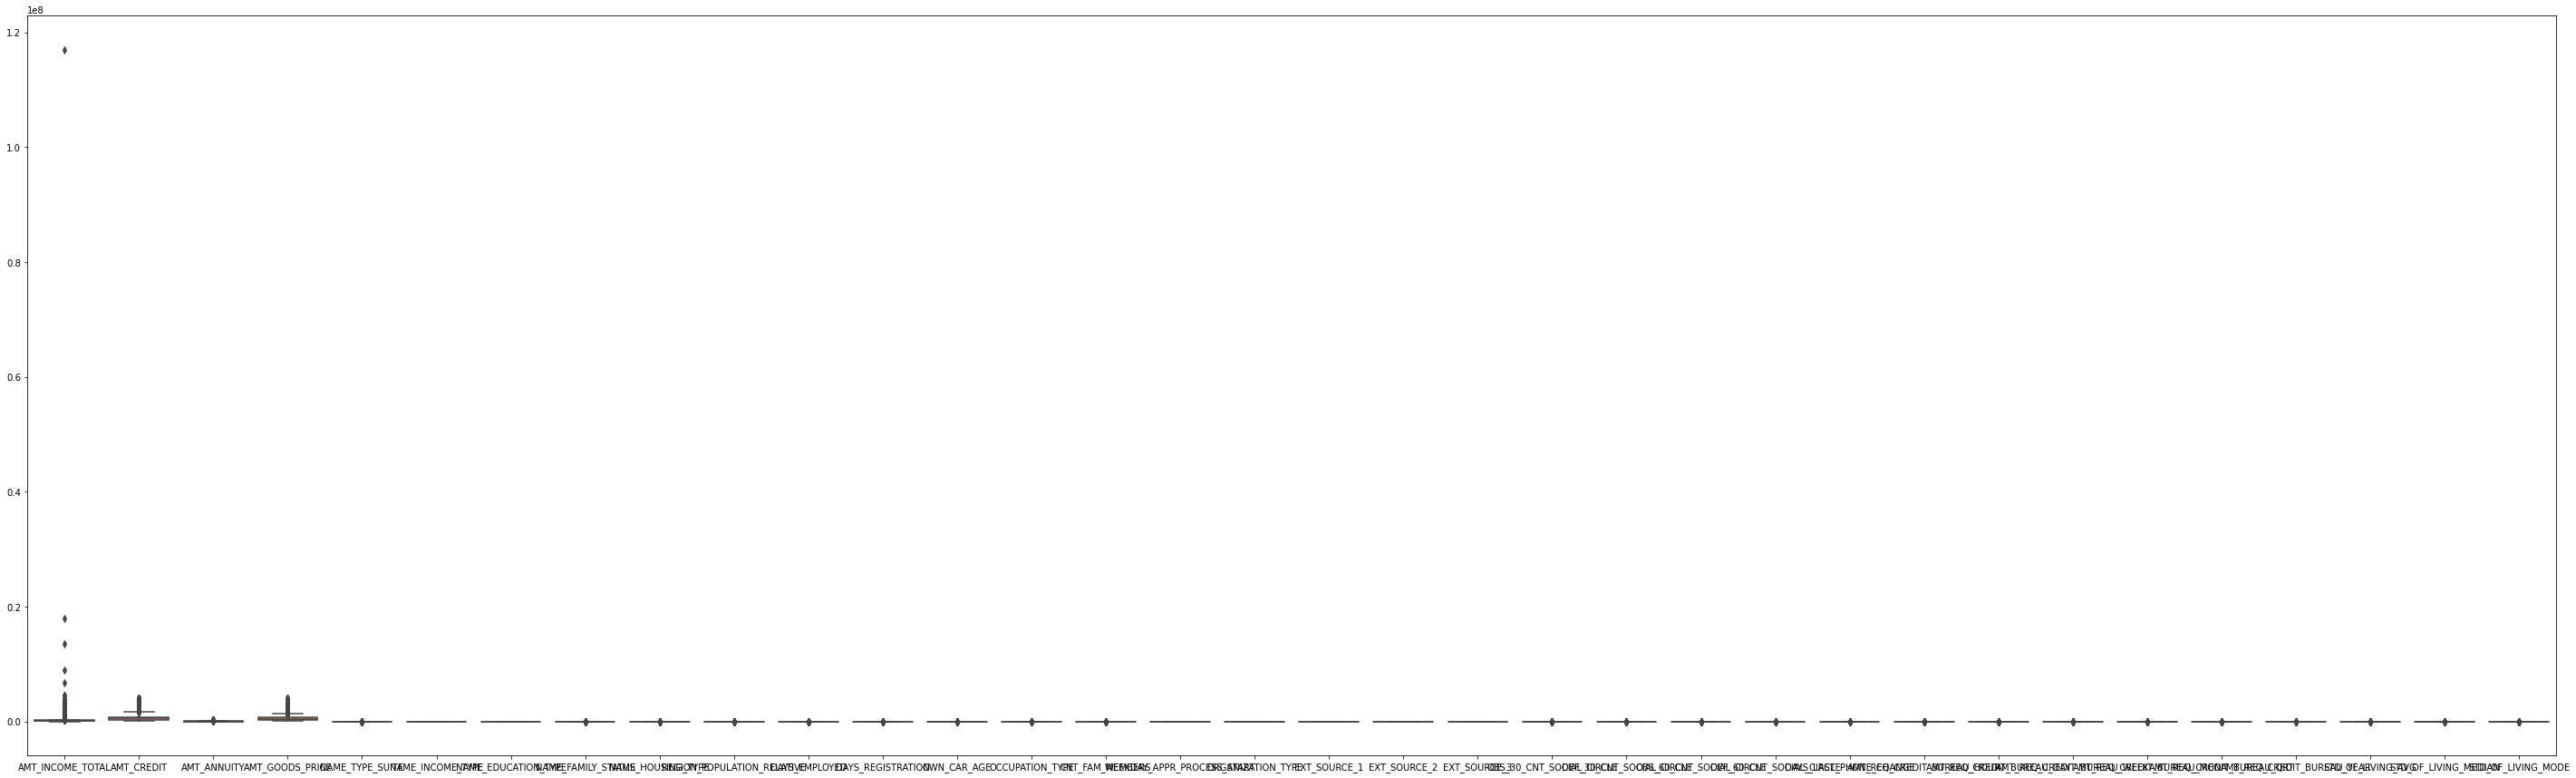

In [99]:
plt.figure(figsize=(50,15))
sns.boxplot(data=df[float_cols])
plt.show()

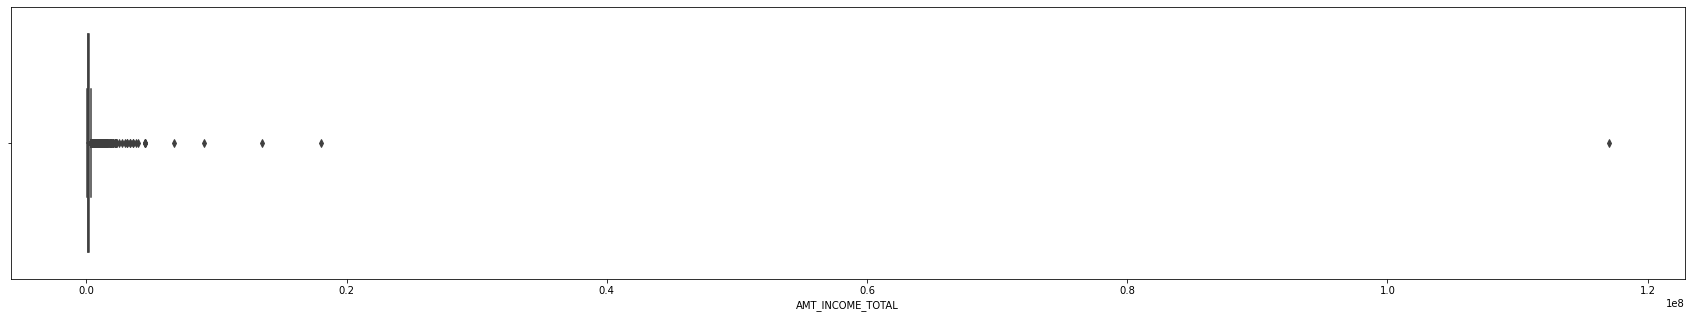

In [100]:
plt.figure(figsize=(30,5))
sns.boxplot(df['AMT_INCOME_TOTAL'])
plt.show()

In [101]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075090e+05
mean     1.687386e+05
std      2.371766e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

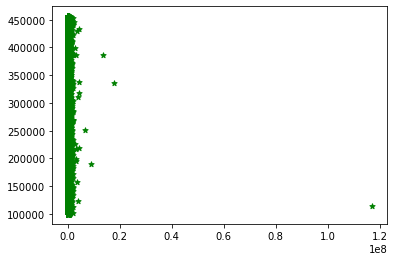

In [102]:
plt.scatter(df['AMT_INCOME_TOTAL'], df['SK_ID_CURR'], label= "stars", color= "green", marker= "*", s=30) 

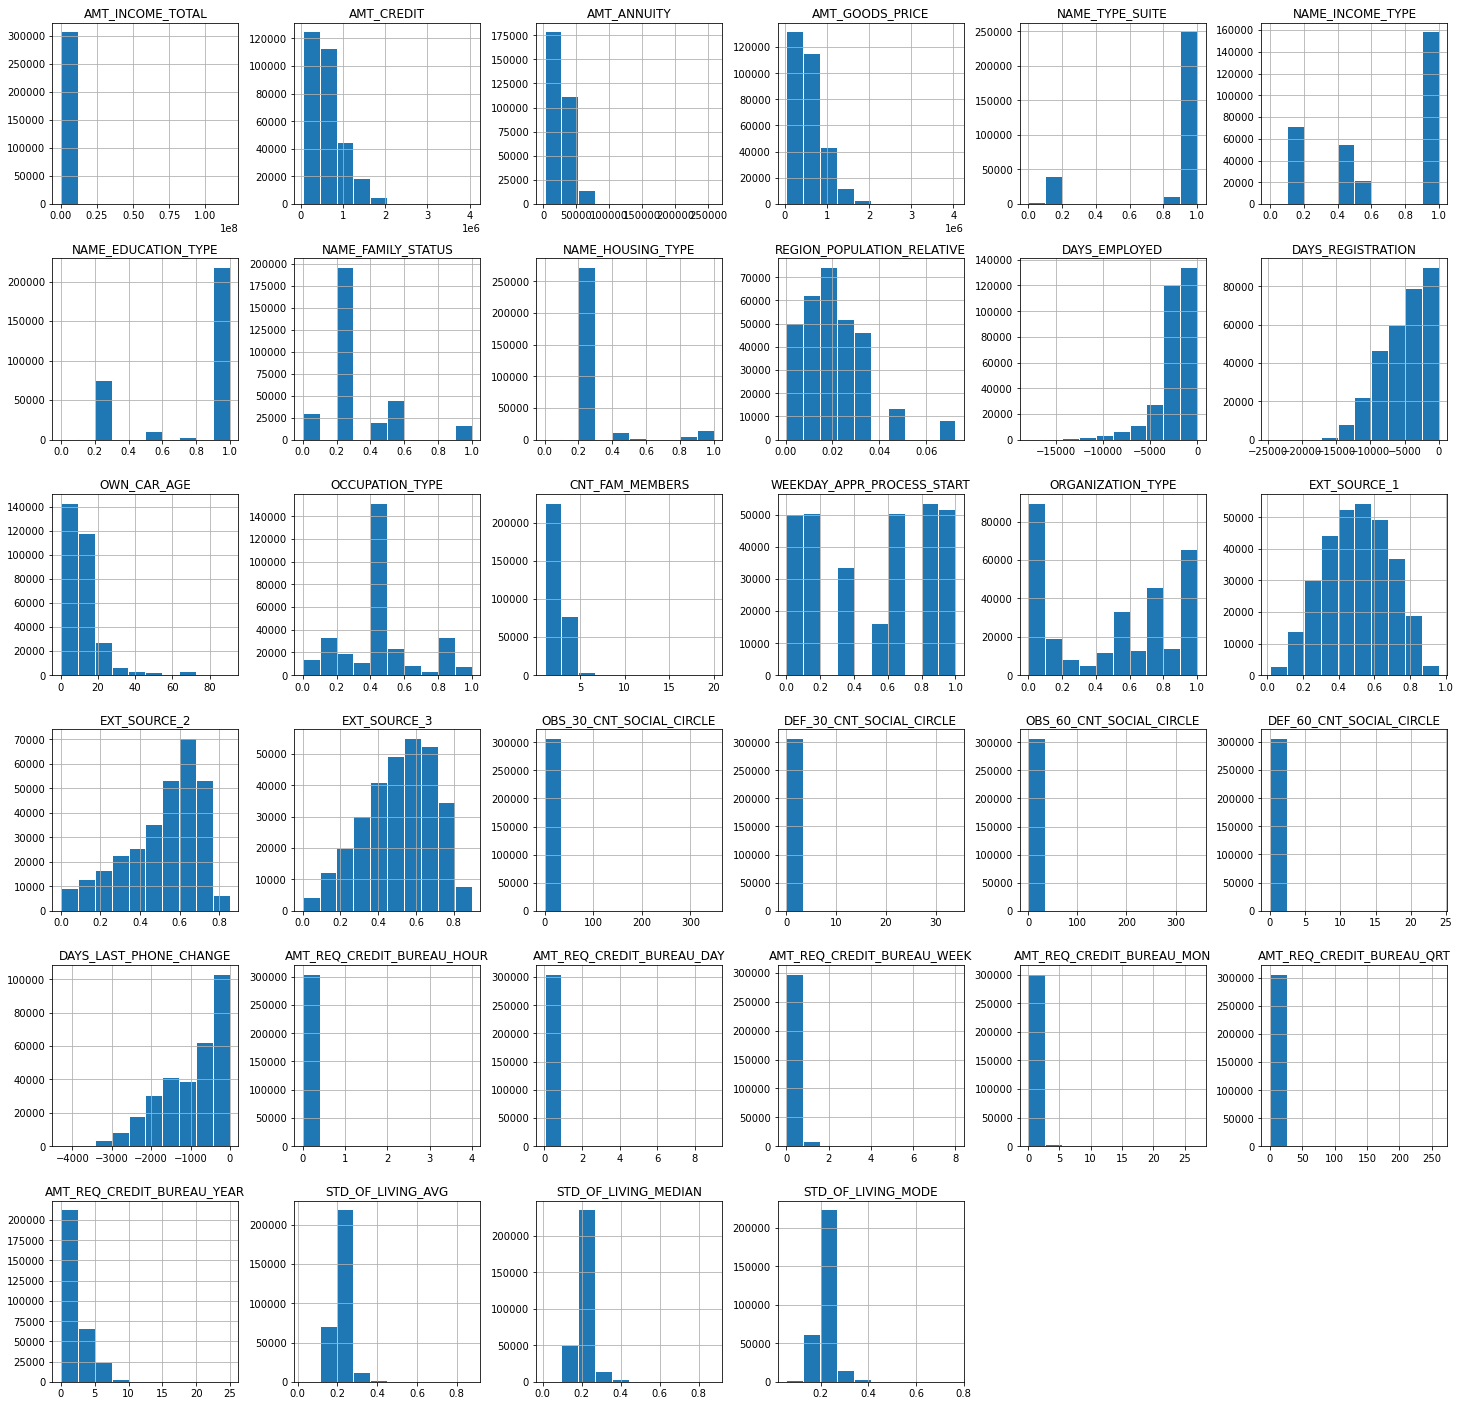

In [103]:
df[float_cols].hist(figsize=(25,25), ec='w')
plt.show()

In [104]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
df[float_cols].corr().style.applymap(color_)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,STD_OF_LIVING_AVG,STD_OF_LIVING_MEDIAN,STD_OF_LIVING_MODE
AMT_INCOME_TOTAL,1.000000,0.156869,0.191653,0.159578,0.012151,-0.044452,-0.096218,-0.019503,-0.007634,0.074801,-0.012856,0.027805,-0.026508,-0.011105,0.016342,0.001303,-0.058272,0.019349,0.060873,-0.027185,-0.013009,-0.013257,-0.012934,-0.013131,-0.018585,0.000746,0.002772,0.002254,0.023054,0.005542,0.010658,0.042475,0.052961,0.008190
AMT_CREDIT,0.156869,1.000000,0.770115,0.986442,-0.018439,-0.071792,-0.120811,-0.101618,-0.054355,0.099754,-0.083499,0.009616,-0.038763,-0.026506,0.063159,0.008756,-0.052625,0.088041,0.131027,0.037617,0.000336,-0.021149,0.000380,-0.023680,-0.073701,-0.002853,0.003615,-0.001611,0.048894,0.014430,-0.045067,0.058651,0.070522,0.017337
AMT_ANNUITY,0.191653,0.770115,1.000000,0.774544,-0.014702,-0.073019,-0.141675,-0.102537,-0.033660,0.118437,-0.049053,0.038524,-0.041324,-0.021723,0.075535,0.009621,-0.077229,0.062726,0.125634,0.025631,-0.011741,-0.022727,-0.011495,-0.023895,-0.063748,0.003756,0.001763,0.011991,0.034713,0.008888,-0.011100,0.073103,0.086394,0.023044
AMT_GOODS_PRICE,0.159578,0.986442,0.774544,1.000000,-0.018109,-0.072425,-0.133854,-0.102672,-0.055471,0.103553,-0.085435,0.011574,-0.043407,-0.028285,0.061135,0.009120,-0.052070,0.091837,0.139143,0.041112,0.000474,-0.022160,0.000484,-0.024421,-0.076243,-0.002264,0.004152,-0.001278,0.050634,0.014924,-0.047420,0.063071,0.075663,0.016379
NAME_TYPE_SUITE,0.012151,-0.018439,-0.014702,-0.018109,1.000000,0.007352,-0.036663,0.037039,0.032241,0.010534,0.020404,0.015547,-0.002053,-0.003720,-0.039143,0.008108,-0.029736,-0.006356,0.004486,-0.031428,-0.035794,-0.008997,-0.035356,-0.007165,-0.015849,0.005160,0.003602,0.003134,0.008424,0.003410,0.009742,0.020522,0.026788,0.007708
NAME_INCOME_TYPE,-0.044452,-0.071792,-0.073019,-0.072425,0.007352,1.000000,0.088295,-0.057385,0.035825,-0.141477,-0.024103,0.069509,0.023005,-0.004420,0.099145,-0.001882,-0.176223,-0.069901,-0.076896,-0.035632,0.015794,0.007243,0.015472,0.007207,0.006282,-0.002864,-0.004372,-0.003170,-0.025407,-0.005236,-0.010652,-0.051784,-0.064107,-0.002715
NAME_EDUCATION_TYPE,-0.096218,-0.120811,-0.141675,-0.133854,-0.036663,0.088295,1.000000,0.007274,-0.017071,-0.070070,-0.020626,-0.099004,0.034672,0.111228,-0.020638,-0.003691,0.092913,-0.060954,-0.119247,0.029706,0.046533,0.032314,0.046646,0.030622,0.000030,-0.002077,-0.001045,0.001553,-0.030093,0.004688,0.062389,-0.086303,-0.110681,-0.012441
NAME_FAMILY_STATUS,-0.019503,-0.101618,-0.102537,-0.102672,0.037039,-0.057385,0.007274,1.000000,0.046824,0.003164,0.004081,-0.084436,0.012407,0.003011,-0.548544,-0.000289,0.106382,0.009234,-0.016930,0.008590,-0.016149,0.006965,-0.015992,0.008558,0.034809,-0.003125,0.002083,-0.000791,-0.005692,0.000296,-0.000345,-0.005173,0.007071,-0.026928
NAME_HOUSING_TYPE,-0.007634,-0.054355,-0.033660,-0.055471,0.032241,0.035825,-0.017071,0.046824,1.000000,-0.017990,0.093738,0.048013,0.005297,0.002276,-0.027200,0.001304,-0.068987,-0.095087,-0.050666,-0.057469,-0.008258,0.002579,-0.008350,0.003681,0.034643,0.004040,0.001350,-0.003789,-0.001886,-0.005243,-0.009794,-0.007612,-0.015604,0.009977
REGION_POPULATION_RELATIVE,0.074801,0.099754,0.118437,0.103553,0.010534,-0.141477,-0.070070,0.003164,-0.017990,1.000000,0.003778,-0.053815,-0.033464,-0.016224,-0.024203,0.000708,-0.049816,0.052483,0.198650,-0.004945,-0.011019,0.006448,-0.010505,0.002597,-0.044013,-0.002329,0

<AxesSubplot:>

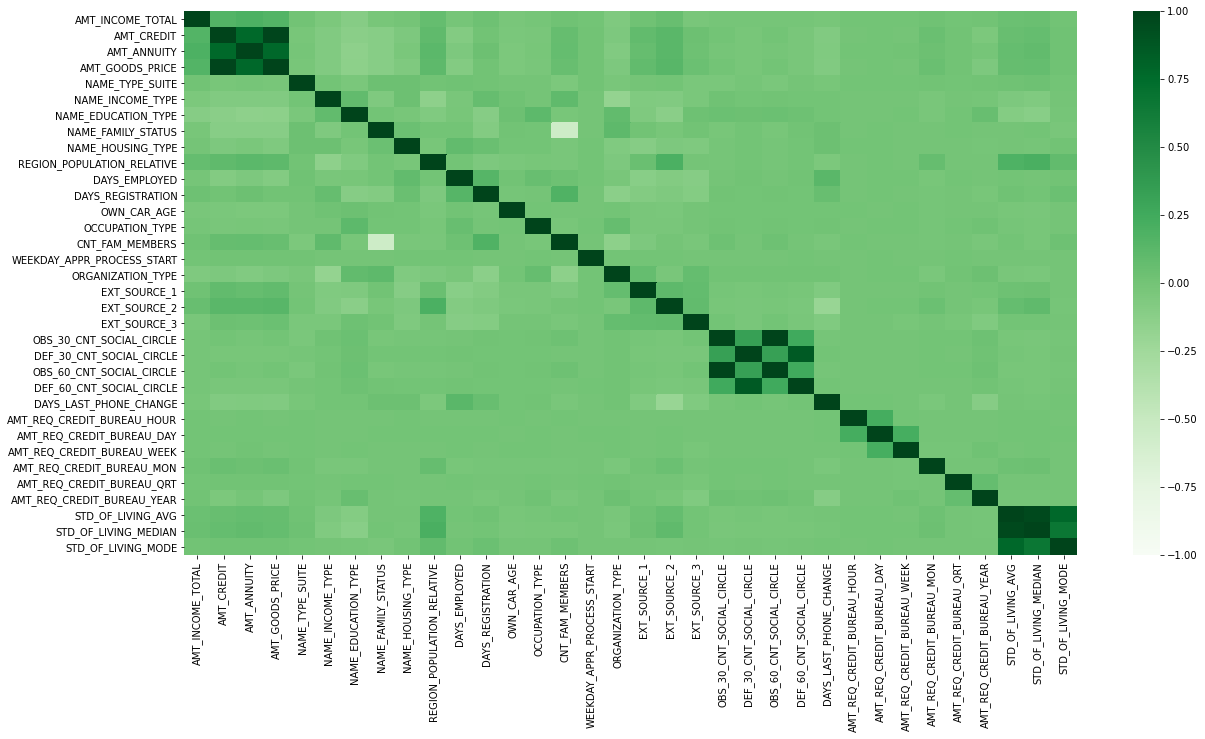

In [105]:
plt.figure(figsize=(20,10))
sns.heatmap(df[float_cols].corr(), cmap='Greens', vmin=-1, vmax=1)

### Inference - 
1. AMT_GOODS_PRICE and AMT_CREDIT are very highly correlated.
2. AMT_ANNUITY is also highly correlated with AMT_CREDIT and AMT_GOODS_PRICE.
3. OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE are correlated among each other.
4. STD_OF_LIVING_AVG, STD_OF_LIVING_MEDIAN and STD_OF_LIVING_MODE are extremely correlated among each other.
5. CNT_FAM_MEMBERS is less correlated with NAME_FAMILY_STATUS.

## Correlation Matrix and Heatmap

In [106]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

In [107]:
df.corr().style.applymap(color_)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,STD_OF_LIVING_AVG,STD_OF_LIVING_MEDIAN,STD_OF_LIVING_MODE
SK_ID_CURR,1.000000,-0.002091,0.001650,-0.000724,0.001208,0.000698,-0.001136,-0.001817,-0.000336,-0.000440,-0.000246,0.000943,-0.002108,-0.000535,0.002851,0.002187,0.000842,-0.001492,-0.000069,-0.000965,-0.000371,0.002393,0.002804,-0.001331,-0.000420,0.002815,0.002771,0.000278,0.001431,-0.002902,-0.001087,-0.001150,0.002187,0.000345,-0.000284,0.001095,0.002901,-0.001888,-0.001589,0.000062,0.002265,0.001184,0.002307,-0.000588,-0.001417,-0.000086,-0.001441,0.001158,-0.000853,-0.003404,0.002118,0.000896,-0.000725,-0.002758,-0.002515,0.002738,-0.000400,0.000027,0.004388,0.002128,0.002404,0.000728
TARGET,-0.002091,1.000000,-0.030893,0.054698,-0.021844,-0.006157,0.019193,-0.003983,-0.030363,-0.012817,-0.039628,0.008312,0.046820,0.054691,-0.004142,0.034492,-0.037231,0.078224,0.070068,0.041973,0.051454,0.013818,0.000534,0.045978,0.028530,0.000370,-0.023823,-0.001756,0.017356,0.009321,0.058900,0.060893,0.003986,-0.024160,0.005577,0.006944,0.002822,0.044399,0.051001,0.032524,-0.030752,-0.075407,-0.160204,-0.148454,0.009079,0.032083,0.008976,0.031110,0.055223,0.044341,-0.028599,-0.011583,-0.011614,0.000113,0.002446,0.000146,-0.009526,-0.001779,0.017735,-0.025039,-0.034387,0.000170
NAME_CONTRACT_TYPE,0.001650,-0.030893,1.000000,-0.008783,0.004020,0.067177,0.029996,-0.003530,-0.221648,-0.241545,-0.185311,0.012005,0.005429,-0.065087,0.011273,0.024189,0.026866,0.086365,0.034091,0.020560,0.052850,0.003789,0.000585,0.054939,-0.033648,-0.097116,-0.021374,-0.010812,0.001655,0.011369,-0.021596,-0.023118,-0.006925,0.035896,0.018561,0.015773,0.007941,0.013586,0.004486,-0.005000,-0.040188,-0.004860,0.015813,-0.004746,-0.018529,-0.008521,-0.018721,-0.006556,0.061830,-0.479724,-0.098809,-0.004900,-0.023433,0.000490,-0.004300,-0.012828,-0.012319,-0.020580,-0.048196,0.013761,0.020009,-0.001271
CODE_GENDER,-0.000724,0.054698,-0.008783,1.000000,0.345845,-0.044387,0.047383,0.074730,0.021608,0.076993,0.022529,0.030005,0.065071,0.009566,-0.099694,0.058774,0.014048,0.148054,0.085634,0.077185,0.000133,-0.001124,-0.002503,0.157239,0.033924,-0.006020,-0.019522,0.018233,-0.038142,0.080548,-0.017889,-0.017293,-0.000258,0.007148,0.023692,0.103459,0.106081,0.048258,0.137583,0.133277,-0.163862,-0.149854,-0.014683,-0.019240,-0.007227,-0.017949,-0.007142,-0.014770,0.025279,-0.087260,-0.100756,0.040453,0.000067,0.002910,0.000749,-0.001613,0.007896,-0.006805,-0.015603,0.018631,0.011023,0.027328
FLAG_OWN_CAR,0.001208,-0.021844,0.004020,0.345845,1.000000,-0.002819,0.102021,0.083384,0.116228,0.141583,0.120332,0.004252,0.033187,-0.093980,-0.131012,-0.004043,0.041311,0.129883,0.021369,0.087770,0.013667,0.001293,-0.002512,0.154662,0.011469,-0.006644,-0.007580,0.032103,-0.043723,0.149897,-0.022673,-0.021410,0.002347,0.014366,-0.000669,0.038936,0.046351,0.003122,0.076078,0.088059,-0.114165,-0.029549,0.053704,-0.012398,0.003231,-0.015100,

<AxesSubplot:>

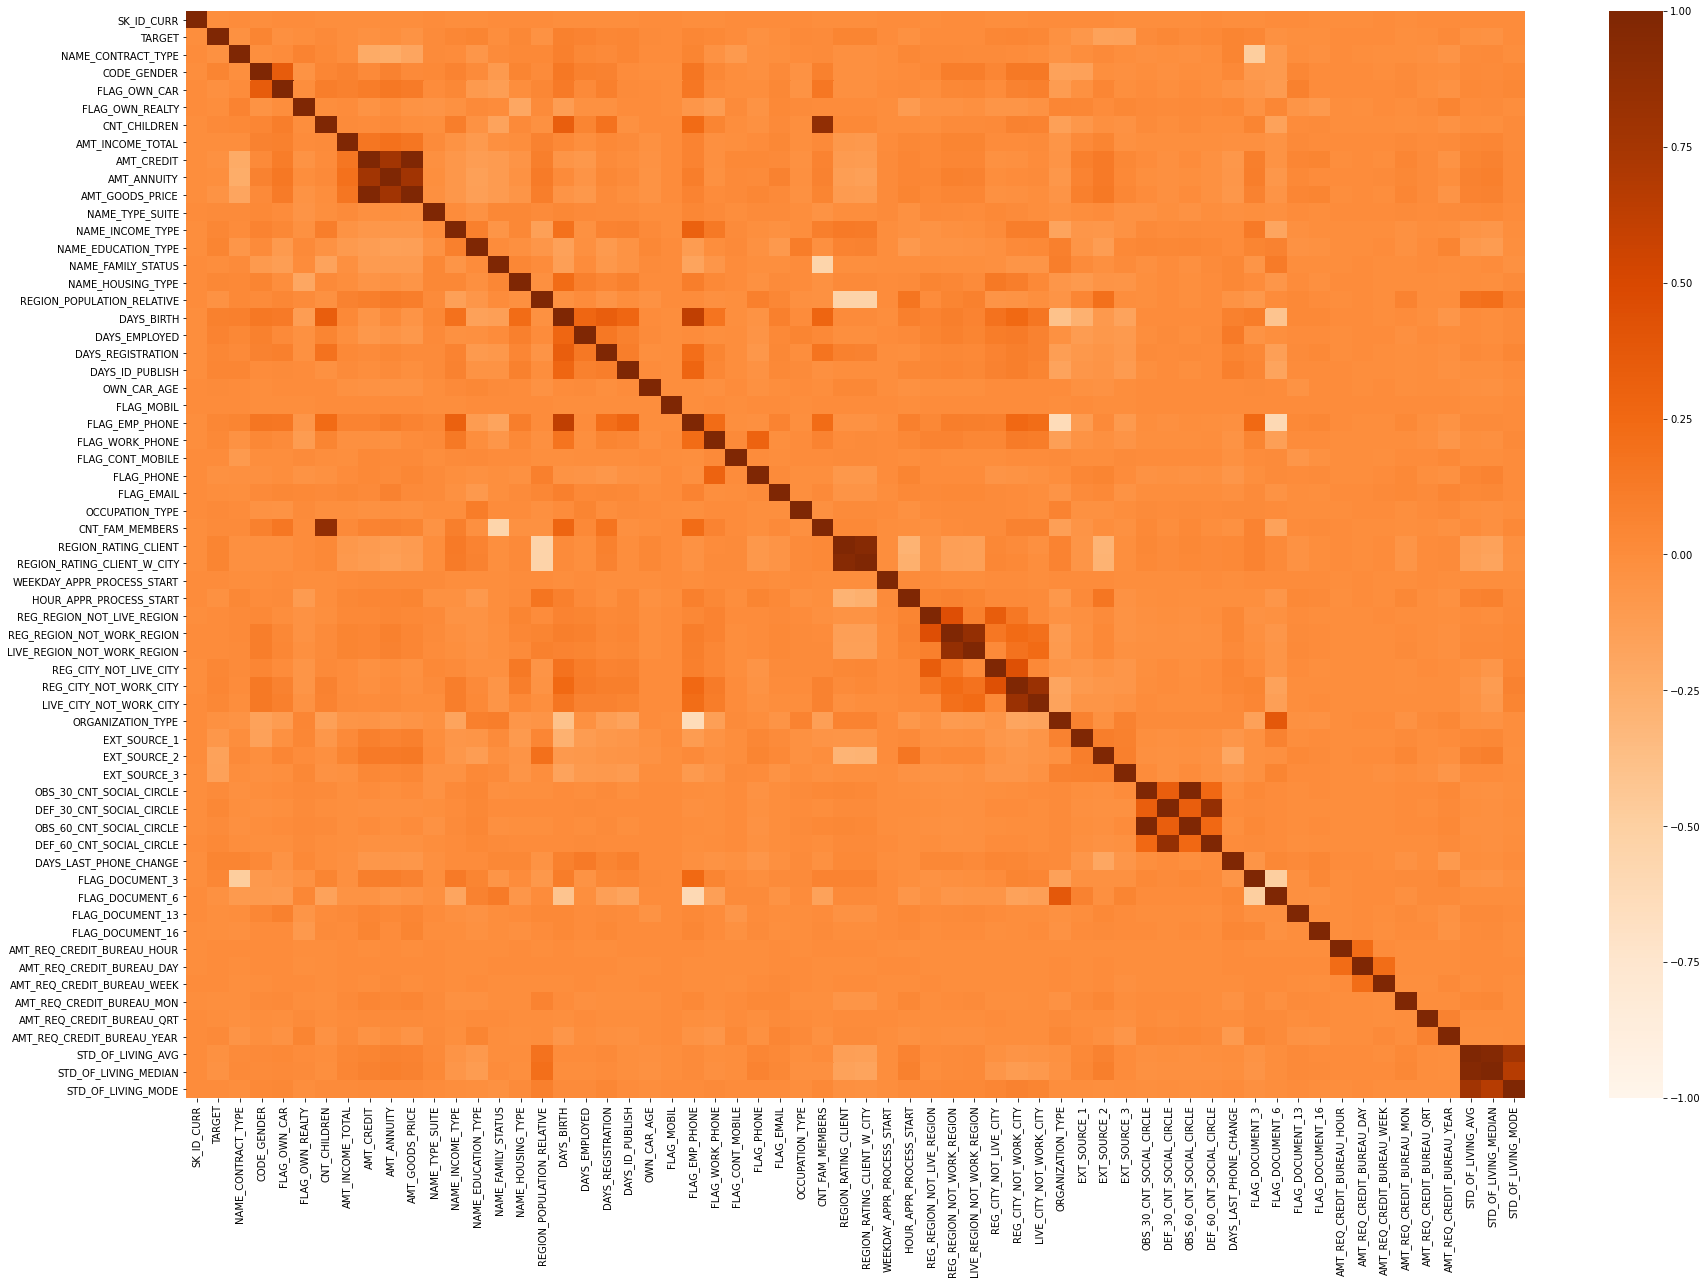

In [108]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), cmap='Oranges', vmin=-1, vmax=1)

In [109]:
df.corr()['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078224
DAYS_EMPLOYED                  0.070068
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058900
DAYS_LAST_PHONE_CHANGE         0.055223
CODE_GENDER                    0.054698
NAME_EDUCATION_TYPE            0.054691
DAYS_ID_PUBLISH                0.051454
REG_CITY_NOT_WORK_CITY         0.051001
NAME_INCOME_TYPE               0.046820
FLAG_EMP_PHONE                 0.045978
REG_CITY_NOT_LIVE_CITY         0.044399
FLAG_DOCUMENT_3                0.044341
DAYS_REGISTRATION              0.041973
NAME_HOUSING_TYPE              0.034492
LIVE_CITY_NOT_WORK_CITY        0.032524
DEF_30_CNT_SOCIAL_CIRCLE       0.032083
DEF_60_CNT_SOCIAL_CIRCLE       0.031110
FLAG_WORK_PHONE                0.028530
CNT_CHILDREN                   0.019193
AMT_REQ_CREDIT_BUREAU_YEAR     0.017735
OCCUPATION_TYPE                0.017356
OWN_CAR_AGE                    0.013818
CNT_FAM_MEMBERS                0.009321


In [110]:
# sk_id_curr on hold
# sus - amt_income_total, FLAG_OWN_REALTY, 
low_corr_cols = ['CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE', 
                'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START', 
                'LIVE_REGION_NOT_WORK_REGION', 'AMT_REQ_CREDIT_BUREAU_DAY', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 
                'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'FLAG_EMAIL', 'AMT_REQ_CREDIT_BUREAU_QRT', 
                'SK_ID_CURR', 'NAME_FAMILY_STATUS', 'AMT_REQ_CREDIT_BUREAU_MON']

In [111]:
df.drop(low_corr_cols, axis=1, inplace=True)

In [112]:
df.shape

(307509, 44)

In [113]:
df.to_csv(r'C:\Users\surya\Desktop\Jupyter Python Programs\Mini Project - Data Mining\clean_credit_card_fraud_detection.csv', index=False)